Data Preprocessing for Stock Price Data

In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Step 2: Load the dataset
df = pd.read_csv("C:\\Users\\durga\\OneDrive\\Desktop\\ExcelR\\AAPL.csv")
print("Initial Data:\n", df.head())


Initial Data:
          Date       Open       High        Low      Close  Adj Close    Volume
0  03-01-2012  58.485714  58.928570  58.428570  58.747143  50.765709  75555200
1  04-01-2012  58.571430  59.240002  58.468571  59.062859  51.038536  65005500
2  05-01-2012  59.278572  59.792858  58.952858  59.718571  51.605175  67817400
3  06-01-2012  59.967144  60.392857  59.888573  60.342857  52.144630  79573200
4  09-01-2012  60.785713  61.107143  60.192856  60.247143  52.061932  98506100


In [3]:
#Convert 'Date' to datetime (for time series)
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.set_index('Date', inplace=True)

In [4]:
# Display basic info
print("Basic Information:\n")
print(df.info())
print("\nStatistical Summary:\n", df.describe())

Basic Information:

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2011 entries, 2012-01-03 to 2019-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2011 non-null   float64
 1   High       2011 non-null   float64
 2   Low        2011 non-null   float64
 3   Close      2011 non-null   float64
 4   Adj Close  2011 non-null   float64
 5   Volume     2011 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 110.0 KB
None

Statistical Summary:
               Open         High          Low        Close    Adj Close  \
count  2011.000000  2011.000000  2011.000000  2011.000000  2011.000000   
mean    126.707469   127.827594   125.580258   126.741235   119.505548   
std      50.483753    50.926301    50.124940    50.578369    52.438444   
min      55.424286    57.085712    55.014286    55.790001    48.921928   
25%      85.882858    86.717858    85.056427    86.202145    75.056679   
50%     113.

In [5]:
# Step 3: Check for missing values
print("\nMissing values before cleaning:\n", df.isnull().sum())



Missing values before cleaning:
 Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [6]:
# Step 4: Handle Missing Values
df.fillna(method='ffill', inplace=True)  # Forward fill
df.fillna(method='bfill', inplace=True)  # Backward fill
print("\nMissing values after cleaning:\n", df.isnull().sum())



Missing values after cleaning:
 Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


C:\Users\durga\AppData\Local\Temp\ipykernel_15164\1338017591.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
C:\Users\durga\AppData\Local\Temp\ipykernel_15164\1338017591.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


In [7]:
# Step 5: Normalize Stock Price Data
scaler = MinMaxScaler(feature_range=(0, 1))
df['Normalized_Close'] = scaler.fit_transform(df[['Close']])
print("\nNormalized close prices:\n", df[['Close', 'Normalized_Close']].head())



Normalized close prices:
                 Close  Normalized_Close
Date                                   
2012-01-03  58.747143          0.012545
2012-01-04  59.062859          0.013884
2012-01-05  59.718571          0.016666
2012-01-06  60.342857          0.019314
2012-01-09  60.247143          0.018908


In [8]:
# Step 6: Create Moving Averages (Feature Engineering)
df['MA_7'] = df['Close'].rolling(window=7).mean()    # 7-day moving average
df['MA_21'] = df['Close'].rolling(window=21).mean()  # 21-day moving average


In [9]:
# Step 7: Calculate Volatility (Feature Engineering)
df['Daily_Return'] = df['Close'].pct_change()  # Daily percentage change
df['Volatility_7'] = df['Daily_Return'].rolling(window=7).std()
df['Volatility_21'] = df['Daily_Return'].rolling(window=21).std()


In [10]:
# Step 8: Drop NaN values created during rolling operations
df.dropna(inplace=True)


In [11]:
# Step 9: Display and Save the Final Processed Data
print("\nProcessed Data Sample:\n", df.head())
df.to_csv("AAPL_processed.csv", index=False)
print("\n Data preprocessing completed! File saved as 'AAPL_processed.csv'")



Processed Data Sample:
                  Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
2012-02-02  65.128571  65.309998  64.854286  65.017143  56.183865   46699100   
2012-02-03  65.328575  65.714287  65.080002  65.668571  56.746796   71649900   
2012-02-06  65.482857  66.425713  65.457146  66.281425  57.276386   62353200   
2012-02-07  66.464287  67.107140  66.368568  66.975716  57.876339   79055900   
2012-02-08  67.214287  68.112854  67.099998  68.097145  58.845402  101972500   

            Normalized_Close       MA_7      MA_21  Daily_Return  \
Date                                                               
2012-02-02          0.039143  64.476938  61.711837     -0.002345   
2012-02-03          0.041906  64.742652  62.026394      0.010019   
2012-02-06          0.044506  65.137346  62.338911      0.009333   
2012-02-07          0.047451  65.577142  62.654762      0.010475   
2012-0

EDA

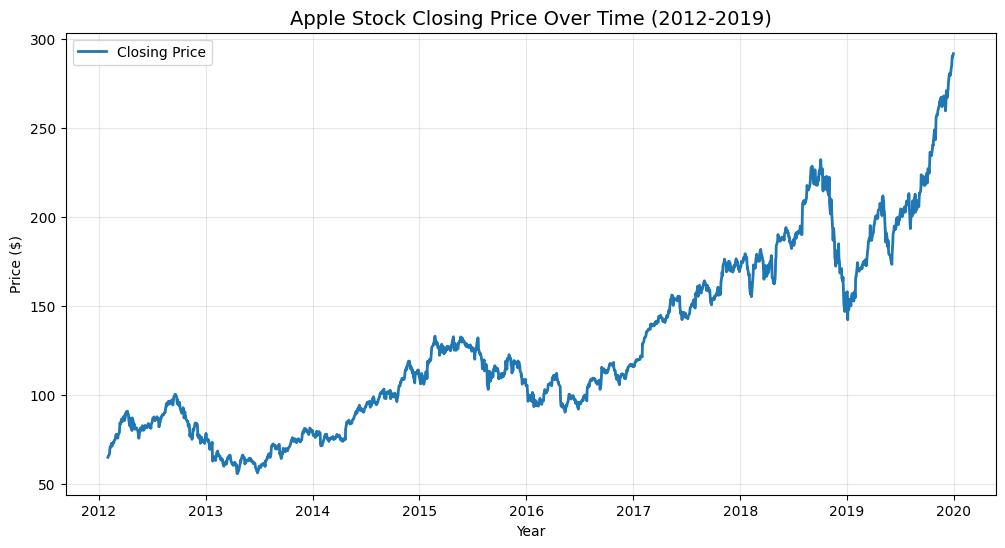

In [12]:
# Plot 1: Closing Price Over Time
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Closing Price', linewidth=2)
plt.title('Apple Stock Closing Price Over Time (2012-2019)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

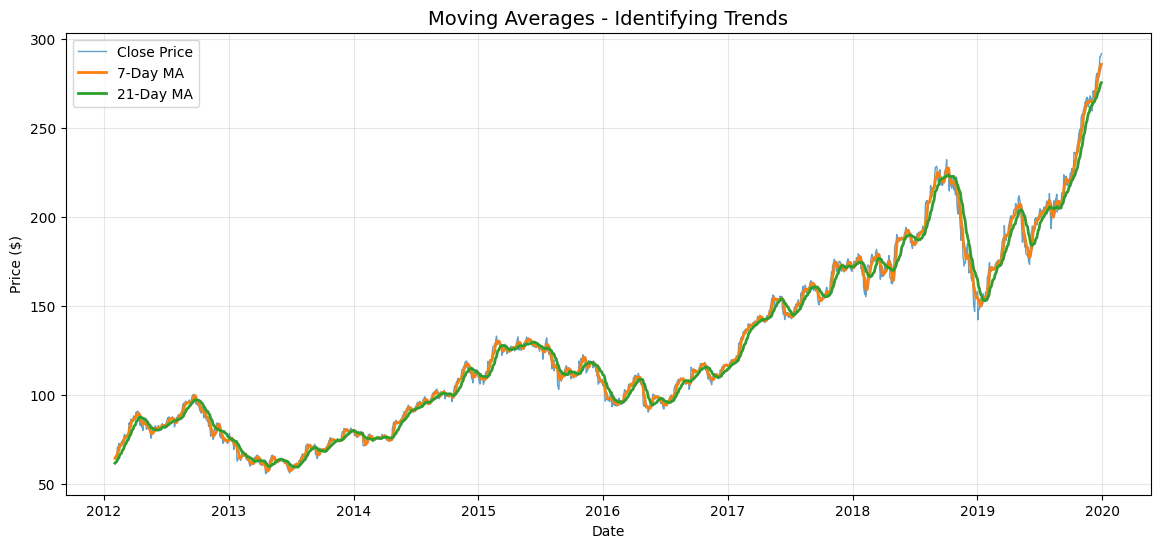

In [13]:
# Plot 2: Moving Averages
plt.figure(figsize=(14, 6))
plt.plot(df['Close'], label='Close Price', linewidth=1, alpha=0.7)
plt.plot(df['MA_7'], label='7-Day MA', linewidth=2)
plt.plot(df['MA_21'], label='21-Day MA', linewidth=2)
plt.title('Moving Averages - Identifying Trends', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

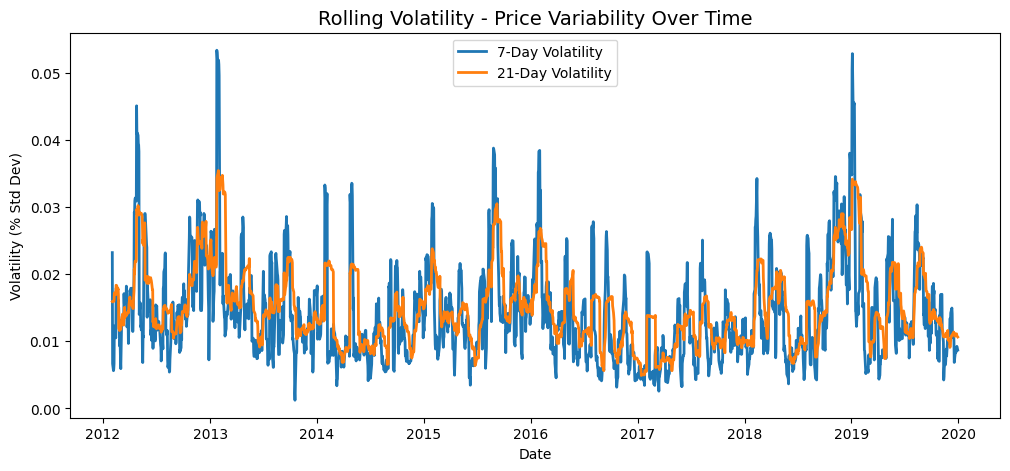


Volatility Summary:
 count    1990.000000
mean        0.000883
std         0.016121
min        -0.123558
25%        -0.006869
50%         0.000671
75%         0.009530
max         0.088741
Name: Daily_Return, dtype: float64


In [14]:
# Plot 3: Rolling Volatility
plt.figure(figsize=(12, 5))
plt.plot(df['Volatility_7'], label='7-Day Volatility', linewidth=2)
plt.plot(df['Volatility_21'], label='21-Day Volatility', linewidth=2)
plt.title('Rolling Volatility - Price Variability Over Time', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Volatility (% Std Dev)')
plt.legend()
plt.show()
print("\nVolatility Summary:\n", df['Daily_Return'].describe())

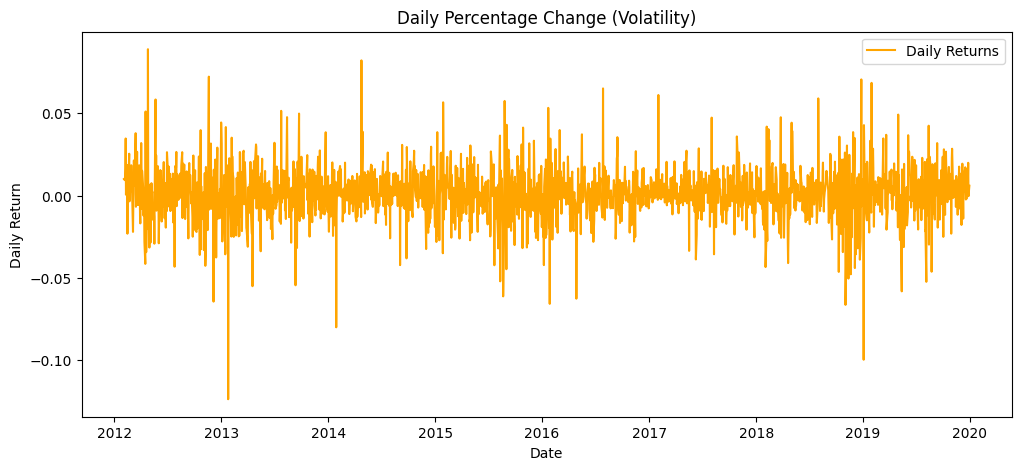


Volatility Summary:
 count    1989.000000
mean        0.000885
std         0.016124
min        -0.123558
25%        -0.006872
50%         0.000676
75%         0.009534
max         0.088741
Name: Daily_Return, dtype: float64


In [15]:
#plot 4: Analyze Daily Returns (Volatility)
df['Daily_Return'] = df['Close'].pct_change()

plt.figure(figsize=(12,5))
plt.plot(df['Daily_Return'], label='Daily Returns', color='orange')
plt.title('Daily Percentage Change (Volatility)')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.show()

print("\nVolatility Summary:\n", df['Daily_Return'].describe())


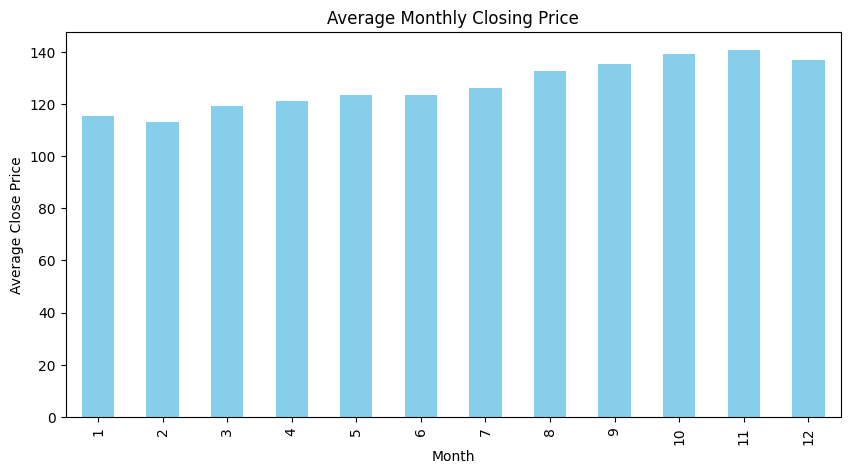

In [16]:
#Step 7: Check for Seasonality (Monthly or Yearly Trends)
# Extract month and year
df['Month'] = df.index.month
df['Year'] = df.index.year

# Average monthly closing price
monthly_trend = df.groupby('Month')['Close'].mean()

plt.figure(figsize=(10,5))
monthly_trend.plot(kind='bar', color='skyblue')
plt.title('Average Monthly Closing Price')
plt.xlabel('Month')
plt.ylabel('Average Close Price')
plt.show()


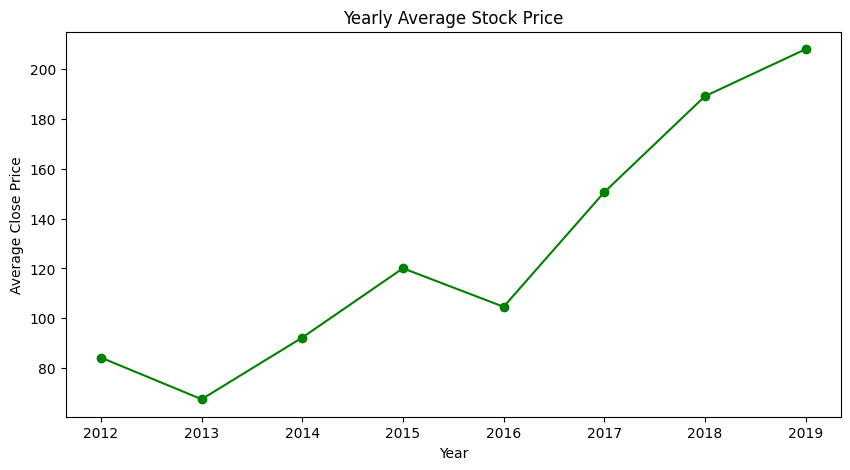

In [17]:
#plot 5: Yearly Trend Comparison
yearly_avg = df.groupby('Year')['Close'].mean()

plt.figure(figsize=(10,5))
plt.plot(yearly_avg, marker='o', color='green')
plt.title('Yearly Average Stock Price')
plt.xlabel('Year')
plt.ylabel('Average Close Price')
plt.show()


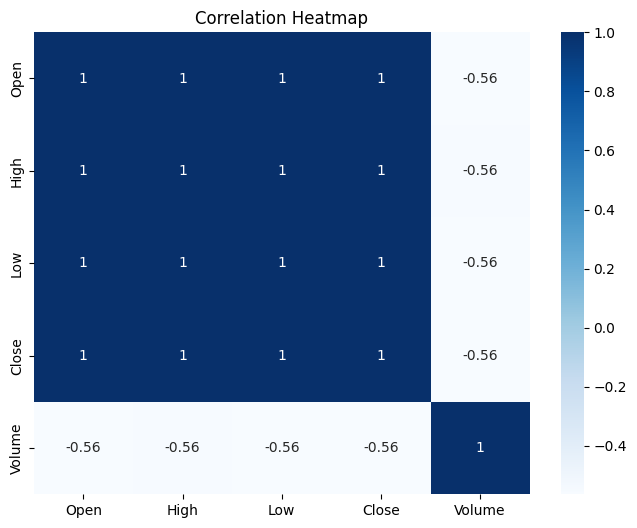

In [18]:
#plot 6: Correlation Analysis (Between Price Columns)
plt.figure(figsize=(8,6))
sns.heatmap(df[['Open', 'High', 'Low', 'Close', 'Volume']].corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()


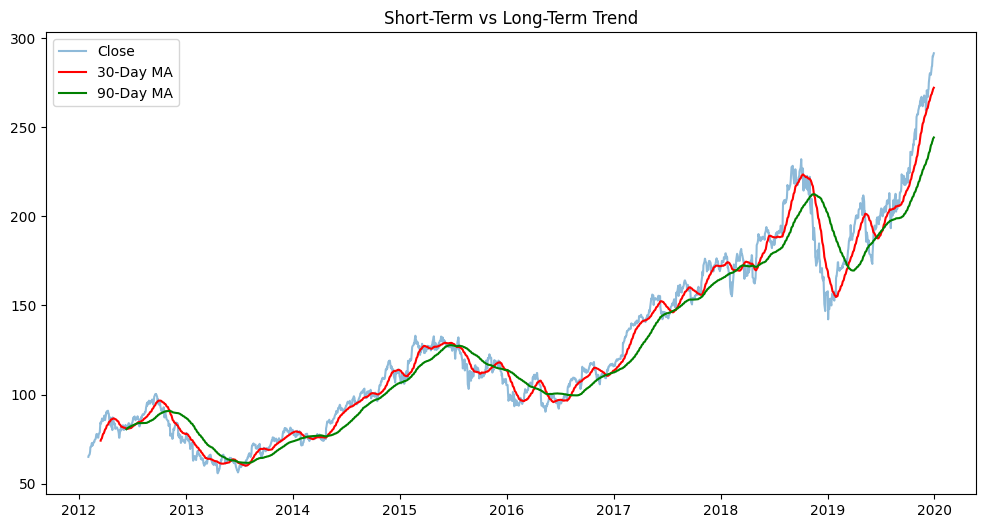

In [19]:
#plot 7: Moving Average Overlay (Pattern Detection)
df['MA_30'] = df['Close'].rolling(window=30).mean()
df['MA_90'] = df['Close'].rolling(window=90).mean()

plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Close', alpha=0.5)
plt.plot(df['MA_30'], label='30-Day MA', color='red')
plt.plot(df['MA_90'], label='90-Day MA', color='green')
plt.title('Short-Term vs Long-Term Trend')
plt.legend()
plt.show()


Summary of Findings:

“From the EDA, we can observe that:

Apple’s stock shows a consistent upward trend over the years.

There are short-term fluctuations — typical of market volatility.

Some seasonal patterns can be noticed, with stronger performance in certain months.

Price-related variables are strongly correlated, and moving averages highlight clear long-term growth.”

2nd week

In [20]:


import os
import json
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import StandardScaler
import joblib
import matplotlib.pyplot as plt
from datetime import timedelta

# Statsmodels
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Optional XGBoost
try:
    from xgboost import XGBRegressor
    HAS_XGB = True
except Exception:
    HAS_XGB = False

# -----------------------------
# Parameters
# -----------------------------
CSV_PATH = "C:\\Users\\durga\\OneDrive\\Desktop\\ExcelR\\AAPL.csv"            # input CSV path
HORIZON = 30                     # forecast horizon (30 days ahead)
HOLDOUT_DAYS = 365               # final test holdout
RANDOM_STATE = 42
ARTIFACT_DIR = "artifacts"
os.makedirs(ARTIFACT_DIR, exist_ok=True)

# -----------------------------
# Utilities
# -----------------------------
def rmse(a, b):
    return sqrt(mean_squared_error(a, b))

def evaluate_multi(y_true, y_pred):
    """Return dict with per-horizon RMSE/MAE/MAPE and means."""
    # y_true, y_pred: (n_samples, horizon)
    assert y_true.shape == y_pred.shape
    rmses = np.sqrt(np.mean((y_true - y_pred)**2, axis=0))
    maes = np.mean(np.abs(y_true - y_pred), axis=0)
    mape = np.mean(np.abs((y_true - y_pred) / (y_true + 1e-9)), axis=0) * 100
    return {
        "rmse_per_horizon": rmses,
        "mae_per_horizon": maes,
        "mape_per_horizon": mape,
        "mean_rmse": float(np.mean(rmses)),
        "mean_mae": float(np.mean(maes)),
        "mean_mape": float(np.mean(mape))
    }

def plot_save(filepath):
    plt.tight_layout()
    plt.savefig(filepath)
    plt.close()

# -----------------------------
# 1) Load & basic cleaning
# -----------------------------
print("Loading CSV:", CSV_PATH)
df = pd.read_csv(CSV_PATH)
# Parse date robustly; if dayfirst formatting was used in the file change dayfirst=True
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=False)
df = df.sort_values('Date').reset_index(drop=True)
df.set_index('Date', inplace=True)

# Keep raw close series for ARIMA-like models
raw_close = df['Close'].copy()

# Ensure numeric columns
for col in ['Open','High','Low','Close','Volume']:
    df[col] = pd.to_numeric(df[col], errors='coerce')
# Forward/back fill small gaps
df[['Open','High','Low','Close','Volume']] = df[['Open','High','Low','Close','Volume']].ffill().bfill()

print("Data loaded. Rows:", len(df))

# -----------------------------
# 2) Feature engineering
# -----------------------------
def add_technical_indicators(df):
    df = df.copy()
    close = df['Close']

    df['Return'] = close.pct_change().fillna(0)
    df['MA7'] = close.rolling(window=7, min_periods=1).mean()
    df['MA30'] = close.rolling(window=30, min_periods=1).mean()
    df['EMA7'] = close.ewm(span=7, adjust=False).mean()
    df['EMA30'] = close.ewm(span=30, adjust=False).mean()
    df['Volatility'] = df['Return'].rolling(window=14, min_periods=1).std()

    df['PriceRange'] = (df['High'] - df['Low']) / (df['Open'] + 1e-9)
    df['Close_lag1'] = close.shift(1)
    df['Close_lag2'] = close.shift(2)
    df['Close_lag3'] = close.shift(3)

    # RSI-14
    delta = close.diff()
    up = delta.clip(lower=0)
    down = -delta.clip(upper=0)
    ma_up = up.rolling(window=14, min_periods=1).mean()
    ma_down = down.rolling(window=14, min_periods=1).mean()
    rs = ma_up / (ma_down + 1e-9)
    df['RSI14'] = 100 - (100 / (1 + rs))

    # MACD
    ema12 = close.ewm(span=12, adjust=False).mean()
    ema26 = close.ewm(span=26, adjust=False).mean()
    df['MACD'] = ema12 - ema26

    df['Volume_MA7'] = df['Volume'].rolling(window=7, min_periods=1).mean()

    # calendar
    df['DayOfWeek'] = df.index.dayofweek
    df['Month'] = df.index.month

    # fill any remaining na
    df = df.fillna(method='bfill').fillna(method='ffill')
    return df

df = add_technical_indicators(df)
print("Added technical indicators.")

# -----------------------------
# 3) Create multi-step supervised targets t+1 .. t+HORIZON
# -----------------------------
for h in range(1, HORIZON+1):
    df[f'target_t+{h}'] = df['Close'].shift(-h)

# drop rows where any target is NaN (these are at end)
df_supervised = df.dropna().copy()
print("Supervised shape after multi-step target creation:", df_supervised.shape)

# -----------------------------
# 4) Train/Test split (time-based)
# -----------------------------
if HOLDOUT_DAYS < HORIZON:
    HOLDOUT_DAYS = max(HOLDOUT_DAYS, HORIZON)

train_df = df_supervised.iloc[:-HOLDOUT_DAYS].copy()
test_df = df_supervised.iloc[-HOLDOUT_DAYS:].copy()
print("Train rows:", len(train_df), "Test rows:", len(test_df))

# -----------------------------
# 5) Feature list, X/y preparation and scaling
# -----------------------------
FEATURE_COLS = [
    'Open','High','Low','Volume',
    'Return','MA7','MA30','EMA7','EMA30','Volatility','PriceRange',
    'Close_lag1','Close_lag2','Close_lag3','RSI14','MACD','Volume_MA7',
    'DayOfWeek','Month'
]
FEATURE_COLS = [c for c in FEATURE_COLS if c in train_df.columns]
print("Using features:", FEATURE_COLS)

X_train = train_df[FEATURE_COLS].values
X_test = test_df[FEATURE_COLS].values

y_cols = [f'target_t+{h}' for h in range(1, HORIZON+1)]
y_train = train_df[y_cols].values
y_test = test_df[y_cols].values

# Save dates for plotting
train_dates = pd.to_datetime(train_df.index)
test_dates = pd.to_datetime(test_df.index)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save scaler and feature list
joblib.dump(scaler, os.path.join(ARTIFACT_DIR, 'scaler.joblib'))
with open(os.path.join(ARTIFACT_DIR, 'feature_cols.json'), 'w') as f:
    json.dump(FEATURE_COLS, f)
print("Saved scaler and feature list in", ARTIFACT_DIR)

# -----------------------------
# 6) Persistence baseline (naive)
# -----------------------------
persistence_preds = []
for i in range(len(test_df)):
    last_close = test_df.iloc[i]['Close']  # the available close at that timestamp
    persistence_preds.append([last_close] * HORIZON)
persistence_preds = np.array(persistence_preds)
persistence_eval = evaluate_multi(y_test, persistence_preds)
print("Persistence mean RMSE:", persistence_eval['mean_rmse'])

# -----------------------------
# 7) ARIMA & SARIMA (statistical multi-step)
#    Fit on raw close series restricted to training date range, forecast HORIZON
# -----------------------------
# Align the raw_close training series to supervised train dates
train_close_series = raw_close.loc[train_dates.min(): train_dates.max()]

# ARIMA
try:
    print("Training ARIMA...")
    arima_model = ARIMA(train_close_series, order=(5,1,0)).fit()
    arima_forecast = arima_model.forecast(steps=HORIZON)
    arima_truth = raw_close.iloc[-HORIZON:].values
    arima_rmse = rmse(arima_truth, arima_forecast)
    print("ARIMA RMSE (final horizon):", arima_rmse)
except Exception as e:
    print("ARIMA training/forecast failed:", e)
    arima_model = None
    arima_forecast = np.full(HORIZON, np.nan)
    arima_rmse = np.inf

# SARIMA
try:
    print("Training SARIMA...")
    sarima_model = SARIMAX(train_close_series, order=(2,1,2), seasonal_order=(1,1,1,12)).fit(disp=False)
    sarima_forecast = sarima_model.get_forecast(steps=HORIZON).predicted_mean.values
    sarima_truth = raw_close.iloc[-HORIZON:].values
    sarima_rmse = rmse(sarima_truth, sarima_forecast)
    print("SARIMA RMSE (final horizon):", sarima_rmse)
except Exception as e:
    print("SARIMA failed:", e)
    sarima_model = None
    sarima_forecast = np.full(HORIZON, np.nan)
    sarima_rmse = np.inf

# -----------------------------
# 8) Machine Learning: RandomForest & XGBoost
#    Direct Multi-output with TimeSeriesSplit and GridSearch
# -----------------------------
tscv = TimeSeriesSplit(n_splits=5)

# RandomForest
print("Tuning RandomForest (TimeSeriesSplit + GridSearch)...")
rf_base = RandomForestRegressor(random_state=RANDOM_STATE, n_jobs=-1)
rf_mor = MultiOutputRegressor(rf_base)
rf_param_grid = {
    "estimator__n_estimators": [100, 300],
    "estimator__max_depth": [5, 10, None]
}
rf_gs = GridSearchCV(rf_mor, rf_param_grid, cv=tscv, scoring='neg_root_mean_squared_error', n_jobs=-1)
rf_gs.fit(X_train_scaled, y_train)
rf_best = rf_gs.best_estimator_
rf_pred = rf_best.predict(X_test_scaled)
rf_eval = evaluate_multi(y_test, rf_pred)
print("RandomForest mean RMSE:", rf_eval['mean_rmse'])
print("RandomForest best params:", rf_gs.best_params_)

# XGBoost (optional)
if HAS_XGB:
    print("Tuning XGBoost (TimeSeriesSplit + GridSearch)...")
    xgb_base = XGBRegressor(objective='reg:squarederror', random_state=RANDOM_STATE, n_jobs=4, verbosity=0)
    xgb_mor = MultiOutputRegressor(xgb_base)
    xgb_param_grid = {
        "estimator__n_estimators": [100, 300],
        "estimator__max_depth": [3, 6]
    }
    xgb_gs = GridSearchCV(xgb_mor, xgb_param_grid, cv=tscv, scoring='neg_root_mean_squared_error', n_jobs=-1)
    xgb_gs.fit(X_train_scaled, y_train)
    xgb_best = xgb_gs.best_estimator_
    xgb_pred = xgb_best.predict(X_test_scaled)
    xgb_eval = evaluate_multi(y_test, xgb_pred)
    print("XGBoost mean RMSE:", xgb_eval['mean_rmse'])
    print("XGBoost best params:", xgb_gs.best_params_)
else:
    xgb_best = None
    xgb_pred = np.full_like(y_test, np.nan)
    xgb_eval = {"mean_rmse": np.inf}

# -----------------------------
# -----------------------------
# 9) Compare models & select best (by mean RMSE across horizon)
# -----------------------------
results_summary = {
    'Persistence': persistence_eval['mean_rmse'],
    'ARIMA': arima_rmse,
    'SARIMA': sarima_rmse,
    'RandomForest': rf_eval['mean_rmse'],
    'XGBoost': xgb_eval['mean_rmse'] if HAS_XGB else np.inf
}

print("\nModel mean RMSE summary:")
for k, v in results_summary.items():
    print(f"{k:12s} : {v:.4f}")

best_name = min(results_summary, key=results_summary.get)
print("\nBest model by mean RMSE:", best_name)

# -------------------------------------------------
# Convert ARIMA/SARIMA forecasts into numpy arrays
# -------------------------------------------------
arima_f = (
    np.array(arima_forecast).reshape(1, -1)
    if arima_model is not None else
    None
)

sarima_f = (
    np.array(sarima_forecast).reshape(1, -1)
    if sarima_model is not None else
    None
)

# -------------------------------------------------
# FINAL unified prediction dictionary
# -------------------------------------------------
model_predictions_map = {
    'RandomForest': (
        rf_best,
        rf_pred
    ),

    'XGBoost': (
        xgb_best,
        xgb_pred
    ),

    'ARIMA': (
        arima_model,
        np.tile(arima_f, (len(test_df), 1))
        if arima_f is not None else np.full((len(test_df), HORIZON), np.nan)
    ),

    'SARIMA': (
        sarima_model,
        np.tile(sarima_f, (len(test_df), 1))
        if sarima_f is not None else np.full((len(test_df), HORIZON), np.nan)
    ),

    'Persistence': (
        None,
        persistence_preds
    )
}

# pick the best model object and predictions
best_model_obj, best_model_preds = model_predictions_map[best_name]



# -----------------------------
# 10) Save artifacts (best model, scaler, feature list, evals)
# -----------------------------
if best_model_obj is not None:
    joblib.dump(best_model_obj, os.path.join(ARTIFACT_DIR, 'best_model.joblib'))
    print("Saved best model to", os.path.join(ARTIFACT_DIR, 'best_model.joblib'))
else:
    # persistence: write marker
    with open(os.path.join(ARTIFACT_DIR, 'best_model.json'), 'w') as f:
        json.dump({'model': 'persistence'}, f)
    print("Saved persistence marker.")

# save other artifacts
joblib.dump({'rf_eval': rf_eval, 'xgb_eval': xgb_eval if HAS_XGB else None, 'persistence_eval': persistence_eval,
             'arima_rmse': arima_rmse, 'sarima_rmse': sarima_rmse},
            os.path.join(ARTIFACT_DIR, 'evaluations.joblib'))

with open(os.path.join(ARTIFACT_DIR, 'results_summary.json'), 'w') as f:
    json.dump(results_summary, f, indent=2)

print("Saved evaluations & results summary in", ARTIFACT_DIR)

# Save feature importances if RF best
if best_name == 'RandomForest':
    try:
        # MultiOutputRegressor -> estimators_ is a list. We'll take the first estimator's importances
        base_rf = best_model_obj.estimators_[0]
        fi = base_rf.feature_importances_
        fi_dict = dict(zip(FEATURE_COLS, fi.tolist()))
        with open(os.path.join(ARTIFACT_DIR, 'feature_importances.json'), 'w') as f:
            json.dump(fi_dict, f, indent=2)

        plt.figure(figsize=(8,6))
        y_pos = np.arange(len(FEATURE_COLS))
        plt.barh(y_pos, fi, align='center')
        plt.yticks(y_pos, FEATURE_COLS)
        plt.title('Feature importances (RandomForest)')
        plot_save(os.path.join(ARTIFACT_DIR, 'feature_importances.png'))
    except Exception as e:
        print("Failed to save RF feature importances:", e)

# Save last test sample forecast (pred vs true)
last_test_pred = best_model_preds[-1] if isinstance(best_model_preds, np.ndarray) else None
last_test_true = y_test[-1]
if last_test_pred is not None:
    out = pd.DataFrame({
        'horizon_day': list(range(1, HORIZON+1)),
        'predicted': last_test_pred,
        'actual': last_test_true
    })
    out.to_csv(os.path.join(ARTIFACT_DIR, 'final_last_test_forecast.csv'), index=False)
    print("Saved final last-test-sample forecast CSV.")

# -----------------------------
# 11) Plots (one-day ahead series & ARIMA/SARIMA multi-step)
# -----------------------------
# One-day ahead (horizon=1) actual vs RF/XGB on test set
plt.figure(figsize=(12,6))
plt.plot(test_dates, y_test[:,0], label='Actual t+1', linewidth=2)
plt.plot(test_dates, rf_pred[:,0], label='RF t+1', linestyle='--')
if HAS_XGB:
    plt.plot(test_dates, xgb_pred[:,0], label='XGB t+1', linestyle='--')
plt.legend(); plt.title('One-day ahead forecasts on test set')
plot_save(os.path.join(ARTIFACT_DIR, 'horizon1_test_plot.png'))

# ARIMA vs SARIMA last HORIZON vs actual
last_horizon_dates = raw_close.index[-HORIZON:]
multi_preds = {}
if arima_model is not None:
    multi_preds['ARIMA'] = arima_forecast
if sarima_model is not None:
    multi_preds['SARIMA'] = sarima_forecast

plt.figure(figsize=(12,6))
plt.plot(last_horizon_dates, raw_close.iloc[-HORIZON:].values, label='Actual', linewidth=2)
for k,v in multi_preds.items():
    plt.plot(last_horizon_dates, v, label=k, linestyle='--')
plt.legend(); plt.title('ARIMA vs SARIMA multi-step final horizon')
plot_save(os.path.join(ARTIFACT_DIR, 'arima_sarima_horizon.png'))

print("Saved plots to", ARTIFACT_DIR)



Loading CSV: C:\Users\durga\OneDrive\Desktop\ExcelR\AAPL.csv
Data loaded. Rows: 2011
Added technical indicators.
Supervised shape after multi-step target creation: (1981, 51)
Train rows: 1616 Test rows: 365
Using features: ['Open', 'High', 'Low', 'Volume', 'Return', 'MA7', 'MA30', 'EMA7', 'EMA30', 'Volatility', 'PriceRange', 'Close_lag1', 'Close_lag2', 'Close_lag3', 'RSI14', 'MACD', 'Volume_MA7', 'DayOfWeek', 'Month']
Saved scaler and feature list in artifacts
Persistence mean RMSE: 16.700512977362557
Training ARIMA...


c:\Users\durga\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\durga\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\durga\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\durga\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is ava

ARIMA RMSE (final horizon): 29.506145704920517
Training SARIMA...


c:\Users\durga\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


SARIMA RMSE (final horizon): 42.01715392417341
Tuning RandomForest (TimeSeriesSplit + GridSearch)...
RandomForest mean RMSE: 50.7504702416042
RandomForest best params: {'estimator__max_depth': 5, 'estimator__n_estimators': 100}

Model mean RMSE summary:
Persistence  : 16.7005
ARIMA        : 29.5061
SARIMA       : 42.0172
RandomForest : 50.7505
XGBoost      : inf

Best model by mean RMSE: Persistence
Saved persistence marker.
Saved evaluations & results summary in artifacts
Saved final last-test-sample forecast CSV.
Saved plots to artifacts


In [22]:
# ================================
# Write Streamlit App from Notebook
# ================================

import os

# Variables from your notebook
ARTIFACT_DIR = ARTIFACT_DIR  # e.g., "artifacts"
HORIZON = HORIZON            # e.g., 30

# Multi-line f-string template for Streamlit
streamlit_template = f"""
import streamlit as st
import pandas as pd
import numpy as np
import joblib, json, os
from datetime import timedelta

ARTIFACT_DIR = "{ARTIFACT_DIR}"
HORIZON = {HORIZON}

st.title("Apple 30-Day Forecast (Demo)")

st.markdown("Upload CSV with columns Date,Open,High,Low,Close,Volume. "
            "The app will run the same preprocessing and produce a 30-day forecast "
            "for the last available date in your file.")

uploaded = st.file_uploader("Upload CSV", type=["csv"])
if uploaded is not None:
    df = pd.read_csv(uploaded)
    df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
    df = df.sort_values("Date").reset_index(drop=True)
    df = df.set_index("Date")

    for c in ["Open","High","Low","Close","Volume"]:
        df[c] = pd.to_numeric(df[c], errors="coerce")

    df[["Open","High","Low","Close","Volume"]] = df[["Open","High","Low","Close","Volume"]].ffill().bfill()

    # === Feature Engineering ===
    def add_technical_indicators(df):
        df = df.copy()
        close = df["Close"]
        df["Return"] = close.pct_change().fillna(0)
        df["MA7"] = close.rolling(7, min_periods=1).mean()
        df["MA30"] = close.rolling(30, min_periods=1).mean()
        df["EMA7"] = close.ewm(span=7, adjust=False).mean()
        df["EMA30"] = close.ewm(span=30, adjust=False).mean()
        df["Volatility"] = df["Return"].rolling(14, min_periods=1).std()
        df["PriceRange"] = (df["High"] - df["Low"]) / (df["Open"] + 1e-9)
        df["Close_lag1"] = close.shift(1)
        df["Close_lag2"] = close.shift(2)
        df["Close_lag3"] = close.shift(3)

        delta = close.diff()
        up = delta.clip(lower=0)
        down = -delta.clip(upper=0)
        ma_up = up.rolling(14, min_periods=1).mean()
        ma_down = down.rolling(14, min_periods=1).mean()
        rs = ma_up / (ma_down + 1e-9)
        df["RSI14"] = 100 - (100 / (1 + rs))

        ema12 = close.ewm(span=12, adjust=False).mean()
        ema26 = close.ewm(span=26, adjust=False).mean()
        df["MACD"] = ema12 - ema26

        df["Volume_MA7"] = df["Volume"].rolling(7, min_periods=1).mean()
        df["DayOfWeek"] = df.index.dayofweek
        df["Month"] = df.index.month
        df = df.fillna(method="bfill").fillna(method="ffill")
        return df

    df = add_technical_indicators(df)

    # Load artifacts
    feat = json.load(open(os.path.join(ARTIFACT_DIR, "feature_cols.json")))
    scaler = joblib.load(os.path.join(ARTIFACT_DIR, "scaler.joblib"))

    last_row = df.tail(1).copy()
    X = last_row[feat].values
    Xs = scaler.transform(X)

    best_model_path = os.path.join(ARTIFACT_DIR, "best_model.joblib")

    if os.path.exists(best_model_path):
        model = joblib.load(best_model_path)
        try:
            pred = model.predict(Xs)
            days = list(range(1, pred.shape[1] + 1))
            out = pd.DataFrame({{"day_ahead": days, "predicted_close": pred.flatten()}})
            st.subheader("30-Day Forecast")
            st.dataframe(out)
            st.line_chart(out.set_index("day_ahead"))
        except Exception as e:
            st.error("Model prediction failed: " + str(e))
    else:
        st.error("No trained model found in artifacts. Please run training first.")
"""

# Save Streamlit file
output_path = os.path.join(ARTIFACT_DIR, "streamlit_app.py")
with open(output_path, "w") as f:
    f.write(streamlit_template)

print("Streamlit app written to:", output_path)


Streamlit app written to: artifacts\streamlit_app.py
